In [ ]:
# Imports
library(Seurat)
library(ggplot2)
library(stringr) 
library(gridExtra)
library(dplyr)
library(tibble)
library(tidyr)
library(patchwork)
library(ggplot2)
library(pheatmap)
library(clusterProfiler)
library(ggrepel)
library(gridExtra)
library(grid)
library(xtable)


# Change setting for visualizing plots within VSCODE
options(repr.plot.width=20, repr.plot.height=18)

# Read human macrophage data (final annotations)
macrophages <- readRDS("../../../data/R Objects/Macrophage R Objects/Old/all_humans_macrophage_subset_v1.rds")

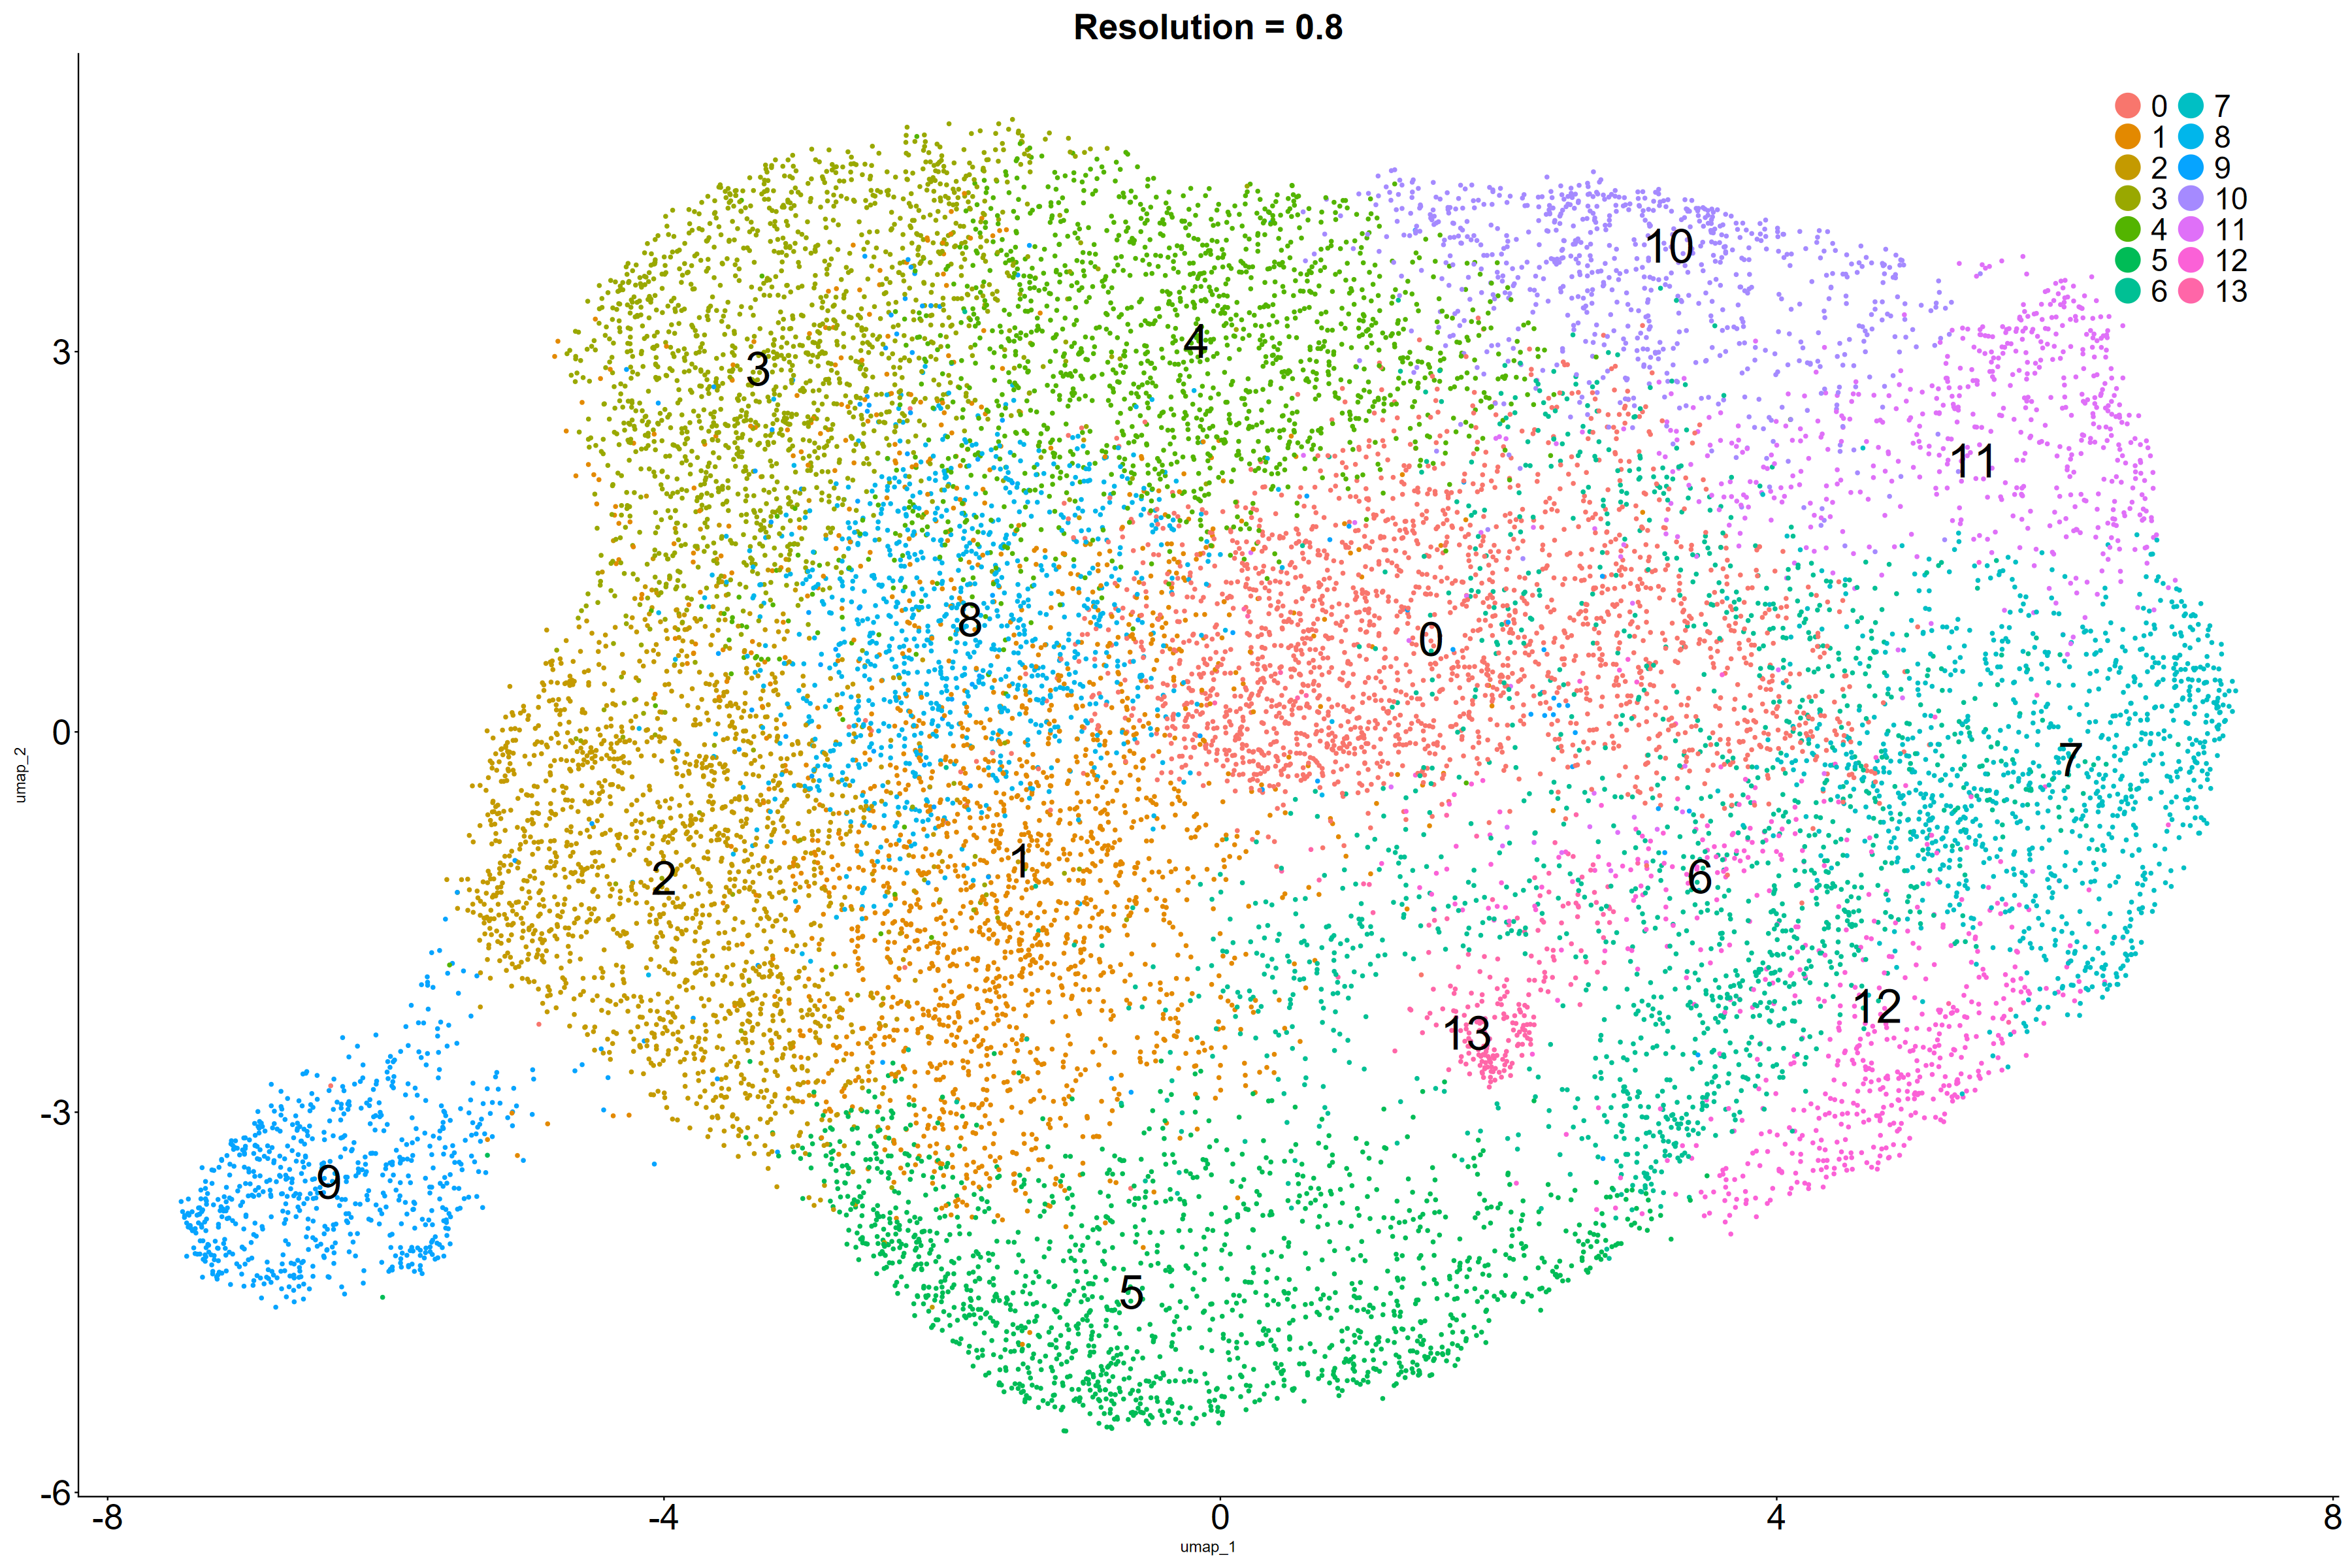

In [ ]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=30, repr.plot.height=20)

# Resolution plot of macrophages
res_2 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T, label.size = 15, repel = T, pt.size = 1.1) + 
    theme(plot.title = element_text(size=32),, axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.9, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2))  + ggtitle("Resolution = 0.8")
res_2

In [32]:
# Get DimPlots of different resolutions
res_1 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32),, axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1)) + ggtitle("Resolution = 0.3")
res_2 <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T, label.size = 11, repel = T) + 
    theme(plot.title = element_text(size=32),, axis.text.x = element_text(size=32), axis.text.y = element_text(size=32), legend.position = c(0.75, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=2))  + ggtitle("Resolution = 0.8")

# Plot
grid.arrange(res_1, res_2, ncol=2)

Warning message:
"The following requested variables were not found: RNA_snn_res.0.3"


ERROR: Error in `[.data.frame`(data, , group): undefined columns selected


In [ ]:
# Assign correct labels
macrophages$seurat_clusters <- macrophages$RNA_snn_res.0.8
macrophages <- SetIdent(macrophages, value = "seurat_clusters")
macrophages <- RenameIdents(macrophages,
                                   '0' = 'Inflammatory macrophages',  # was Inflammatory Resident-like
                                   '1' = 'Inflammatory macrophages',
                                   '2' = 'Inflammatory macrophages', 
                                   '3' = 'Resident-like macrophages', #3
                                   '4' = 'Resident-like macrophages',
                                   '5' = 'iLAMs',
                                   '6' = 'iLAMs',
                                   '7' = 'LAMs',
                                   '8' = 'Inflammatory macrophages', # was Inflammatory Resident-like
                                   '9' = 'IFNIC macrophages',
                                   '10' = 'LAMs',
                                   '11' = 'LAMs',
                                   '12' = 'iLAMs',
                                   '13' = 'Proliferating macrophages')

In [ ]:
# Find markers for subtypes
markers <- FindAllMarkers(macrophages, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Heatmap
top10 <- markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

Calculating cluster Inflammatory macrophages



Calculating cluster Resident-like macrophages

Calculating cluster iLAMs

Calculating cluster LAMs

Calculating cluster IFNIC macrophages

Calculating cluster Proliferating macrophages



In [ ]:
# Get top markers, for appendix
top_markers <- markers %>%
  group_by(cluster) %>%
  top_n(n = 30, wt = avg_log2FC) %>%
  arrange(cluster, desc(avg_log2FC))

# Create a smaller version to avoid massive tables
latex_table <- top_markers %>% dplyr::select(cluster, gene, avg_log2FC, pct.1, pct.2, p_val, p_val_adj)

# Convert to LaTeX table
print(xtable(latex_table), include.rownames = FALSE)

% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Sun Mar 30 21:46:10 2025
\begin{table}[ht]
\centering
\begin{tabular}{llrrrrr}
  \hline
cluster & gene & avg\_log2FC & pct.1 & pct.2 & p\_val & p\_val\_adj \\ 
  \hline
Inflammatory macrophages & FCGBP & 2.46 & 0.35 & 0.12 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & CX3CR1 & 1.87 & 0.34 & 0.12 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & PLD4 & 1.86 & 0.26 & 0.09 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & C3 & 1.42 & 0.38 & 0.21 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & HTRA1 & 1.39 & 0.40 & 0.21 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & USP53 & 1.38 & 0.41 & 0.21 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & ALOX5AP & 1.29 & 0.58 & 0.34 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & VMO1 & 1.25 & 0.57 & 0.35 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & BHLHE41 & 1.21 & 0.32 & 0.17 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & IGSF21 & 1.15 & 0.36 & 0.18 & 0.00 & 0.00 \\ 
  Inflammatory macrophages & GA

In [ ]:
# Proportion tables
Percentage_cells <- prop.table(table(Idents(macrophages))) * 100

# Combine tables side by side
combined_df <- cbind(Percentage_cells)

# Print
combined_df

# Needs to be dataframe
Percentage_cells_df <- as.data.frame(Percentage_cells)
colnames(Percentage_cells_df) <- c("Celltype", "Percentage")

# Basic piechart
pie_chart_total <- ggplot(Percentage_cells_df, aes(x="", y=Percentage, fill=Celltype)) +
  geom_bar(stat="identity", width=1) +
  #scale_fill_manual(values = colors ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_blank(),
    panel.grid = element_blank()) +
  geom_text_repel(aes(label = paste0(round(Percentage, 1), "%")),  
            position = position_stack(vjust = .5), 
            color = "black",
            size = 16) +
  coord_polar("y", start=0)

# Calculate the proportions as percentages
percentage_per_orig <- prop.table(table(Idents(macrophages), macrophages$orig.ident), 2) * 100

# Needs to be dataframe
percentage_per_orig_df <- as.data.frame(percentage_per_orig)
percentage_per_orig_df <- percentage_per_orig_df %>%
  mutate(Var2 = recode(Var2, 
                            "Healthy (CD20, CD8, CHOW)" = "CD20, CD8, CD Baseline"))

# Assign colnames
colnames(percentage_per_orig_df) <- c("Celltype", "Condition", "Percentage")

# Create a stacked bar plot
barplot_per_origin <- ggplot(percentage_per_orig_df, aes(x = Condition, y = Percentage, fill = Celltype)) +
  geom_bar(stat = "identity") + 
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 32, face = "bold"),
    panel.grid = element_blank()
  ) 

Percentage_cells
Inflammatory macrophages  39.347972       
Resident-like macrophages 19.291700       
iLAMs                     21.022693       
LAMs                      14.178237       
IFNIC macrophages          4.783167       
Proliferating macrophages  1.376231

In [ ]:
# Dotplot
known_ilams_h <- c("TREM1", "PLIN2", "CCL2", "CCL7", "VCAN")

# Dotplot
dotplot_all_markers <- DotPlot(subset(macrophages, idents = "iLAM"), features = known_ilams_h) + RotatedAxis() + ggtitle("Expression of known iLAM markers in human iLAM population")
 labs(y = NULL) +
 theme(
  axis.title.x = element_blank(),
    axis.text.x = element_text(size = 30), 
    axis.text.y = element_text(size = 30), 
    legend.text = element_text(size = 30), 
    legend.title = element_text(size = 30) 
  )
dotplot_all_markers

ERROR: Error in WhichCells.Seurat(object = x, cells = cells, idents = idents, : Cannot find the following identities in the object: iLAM


In [ ]:
# Plot of res = 1.5
res_1.5_plot <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T, label.size = 7) + theme(legend.position= "none", plot.title = element_blank())

# Replace SELENOP to mouse homolog Sepp1
known_markers_h <- c("LPL", "CD36", "FABP4", "LYVE1", "FOLR2", "C1QA", "CX3CR1", "SELENOP", "S100A8", "S100A9", "NLRP3", "IL1B", "CXCL2", "TREM2", "FABP5", "APOE", "CD9", "APOC1", "TREM1", "PLIN2", "CCL2", "CCL7", "VCAN", "ISG15", "IRF7", "IFIT3", "IFIT1", "STMN1", "TOP2A", "MKI67", "TUBA1B")

# Dotplot
dotplot_all_markers <- DotPlot(macrophages, features = known_markers_h) + RotatedAxis() +
 labs(y = NULL) +
 theme(
  axis.title.x = element_blank(),
    axis.text.x = element_text(size = 18), 
    axis.text.y = element_text(size = 18), 
    legend.text = element_text(size = 13), 
    legend.title = element_text(size = 13) 
  )

# Final annotation plot
final_annotation <- DimPlot(object = macrophages, reduction = "umap", label = F, label.size = 7, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.4, 0.9), legend.text = element_text(size = 28), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

#heatmap <- DoHeatmap(macrophages, features = top10$gene, size=5, angle=0, raster=FALSE, label = FALSE) +
 # scale_fill_viridis_c(option="blue",na.value = "white") + theme(legend.position= "none", axis.text.y = element_text(size=15))


Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."


In [ ]:
# Define the layout matrix
layout_matrix <- rbind(
  c(1, 1, 3, 3),
  c(1, 1, 3, 3),
  c(1, 1, 3, 3),
  c(5, 5, 4, 4),
  c(5, 5, 4, 4),
  c(5, 5, 4, 4),
  c(2, 2, 2, 6)
)

# Create labeled plots
cluster_umap <- arrangeGrob(res_1.5_plot, 
                                  top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 14, fontface = "bold")))

dotplot_markers <- arrangeGrob(dotplot_all_markers, 
                               top = textGrob("E)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))

final_annotation_plot <- arrangeGrob(final_annotation, 
                               top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))

heatmap_plot <- arrangeGrob(heatmap, 
                               top = textGrob("D)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))

barplot_plot <- arrangeGrob(barplot_per_origin, 
                               top = textGrob("C)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))

pie_chart_total_plot <- arrangeGrob(pie_chart_total, 
                               top = textGrob("F)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 14, fontface = "bold")))                                              

# Arrange the plots with labels
grid.arrange(
  cluster_umap, dotplot_markers, final_annotation_plot, heatmap_plot, barplot_plot, pie_chart_total_plot,
  layout_matrix = layout_matrix
)

ERROR: [1m[33mError[39m in `gtable_add_grob()`:[22m
[33m![39m `grobs` must be a single grob or a list of grobs, not a list.


In [16]:
# Plot of res = 1.5
res_1.5_plot <- DimPlot(macrophages, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T, label.size = 7) + theme(legend.position= "none", plot.title = element_blank())

# Replace SELENOP to mouse homolog Sepp1
known_markers_h <- c("LYVE1", "FOLR2", "C1QA", "CX3CR1", "SELENOP", "S100A8", "S100A9", "NLRP3", "IL1B", "CXCL2", "TREM2", "FABP5", "APOE", "CD9", "APOC1", "TREM1", "PLIN2", "CCL2", "CCL7", "VCAN", "ISG15", "IRF7", "IFIT3", "IFIT1", "STMN1", "TOP2A", "MKI67", "TUBA1B")

# Dotplot
dotplot_all_markers <- DotPlot(macrophages, features = known_markers_h) + RotatedAxis() +
 labs(y = NULL) +
 theme(
  axis.title.x = element_blank(),
    axis.text.x = element_text(size = 28), 
    axis.text.y = element_text(size = 28), 
    legend.text = element_text(size = 24), 
    legend.title = element_text(size = 24) 
  )

# Final annotation plot
final_annotation <- DimPlot(object = macrophages, reduction = "umap", label = T, label.size = 12, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.02, 0.92), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

heatmap <- DoHeatmap(macrophages, features = top10$gene, size=5, angle=0, raster=FALSE, label = FALSE) +
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(axis.text.y = element_text(size=27)) + guides(
  colour = FALSE, fill = guide_colorbar(
    barwidth = 2, 
    bar.height = 60, 
    title.theme = element_text(size = 24),
    label.theme = element_text(size = 24))
  )

  

Warning message in DoHeatmap(macrophages, features = top10$gene, size = 5, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: PDGFC"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."


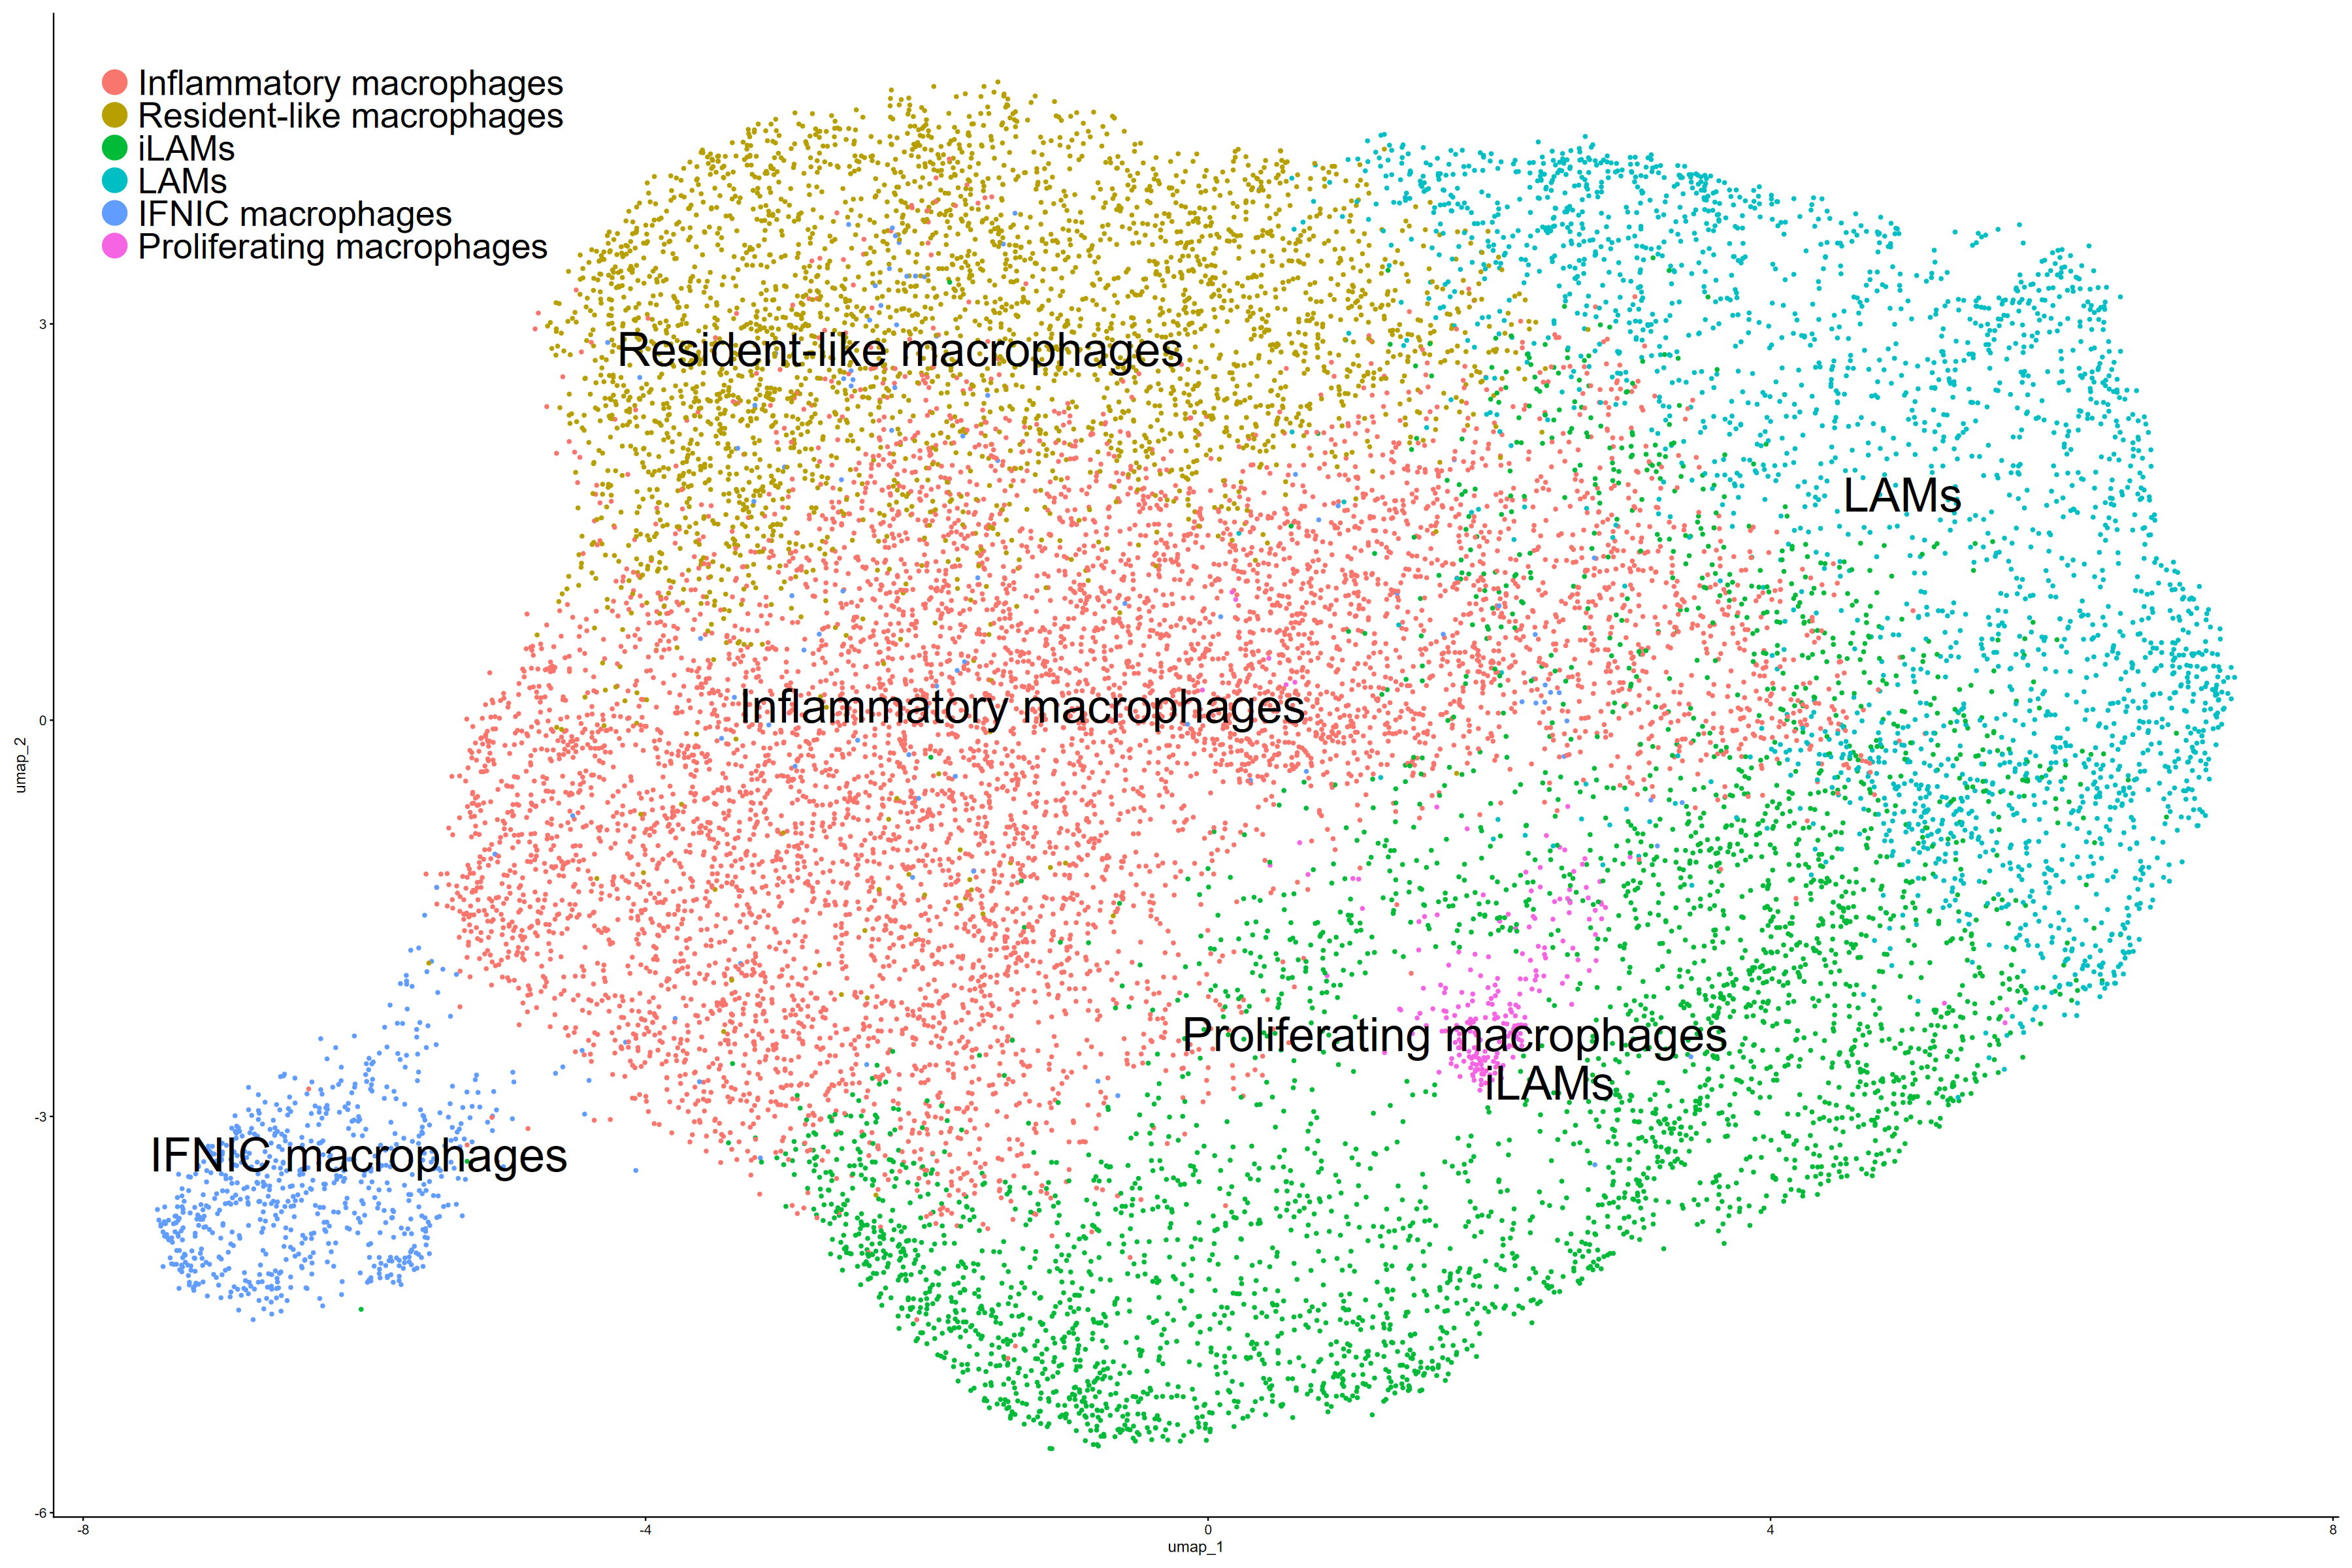

In [47]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=30, repr.plot.height=20)

final_annotation_h <- DimPlot(object = macrophages, reduction = "umap", label = T, label.size = 15, repel = T, pt.size = 1.1) + 
    theme(plot.title = element_blank(), legend.position = c(0.02, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

final_annotation_h

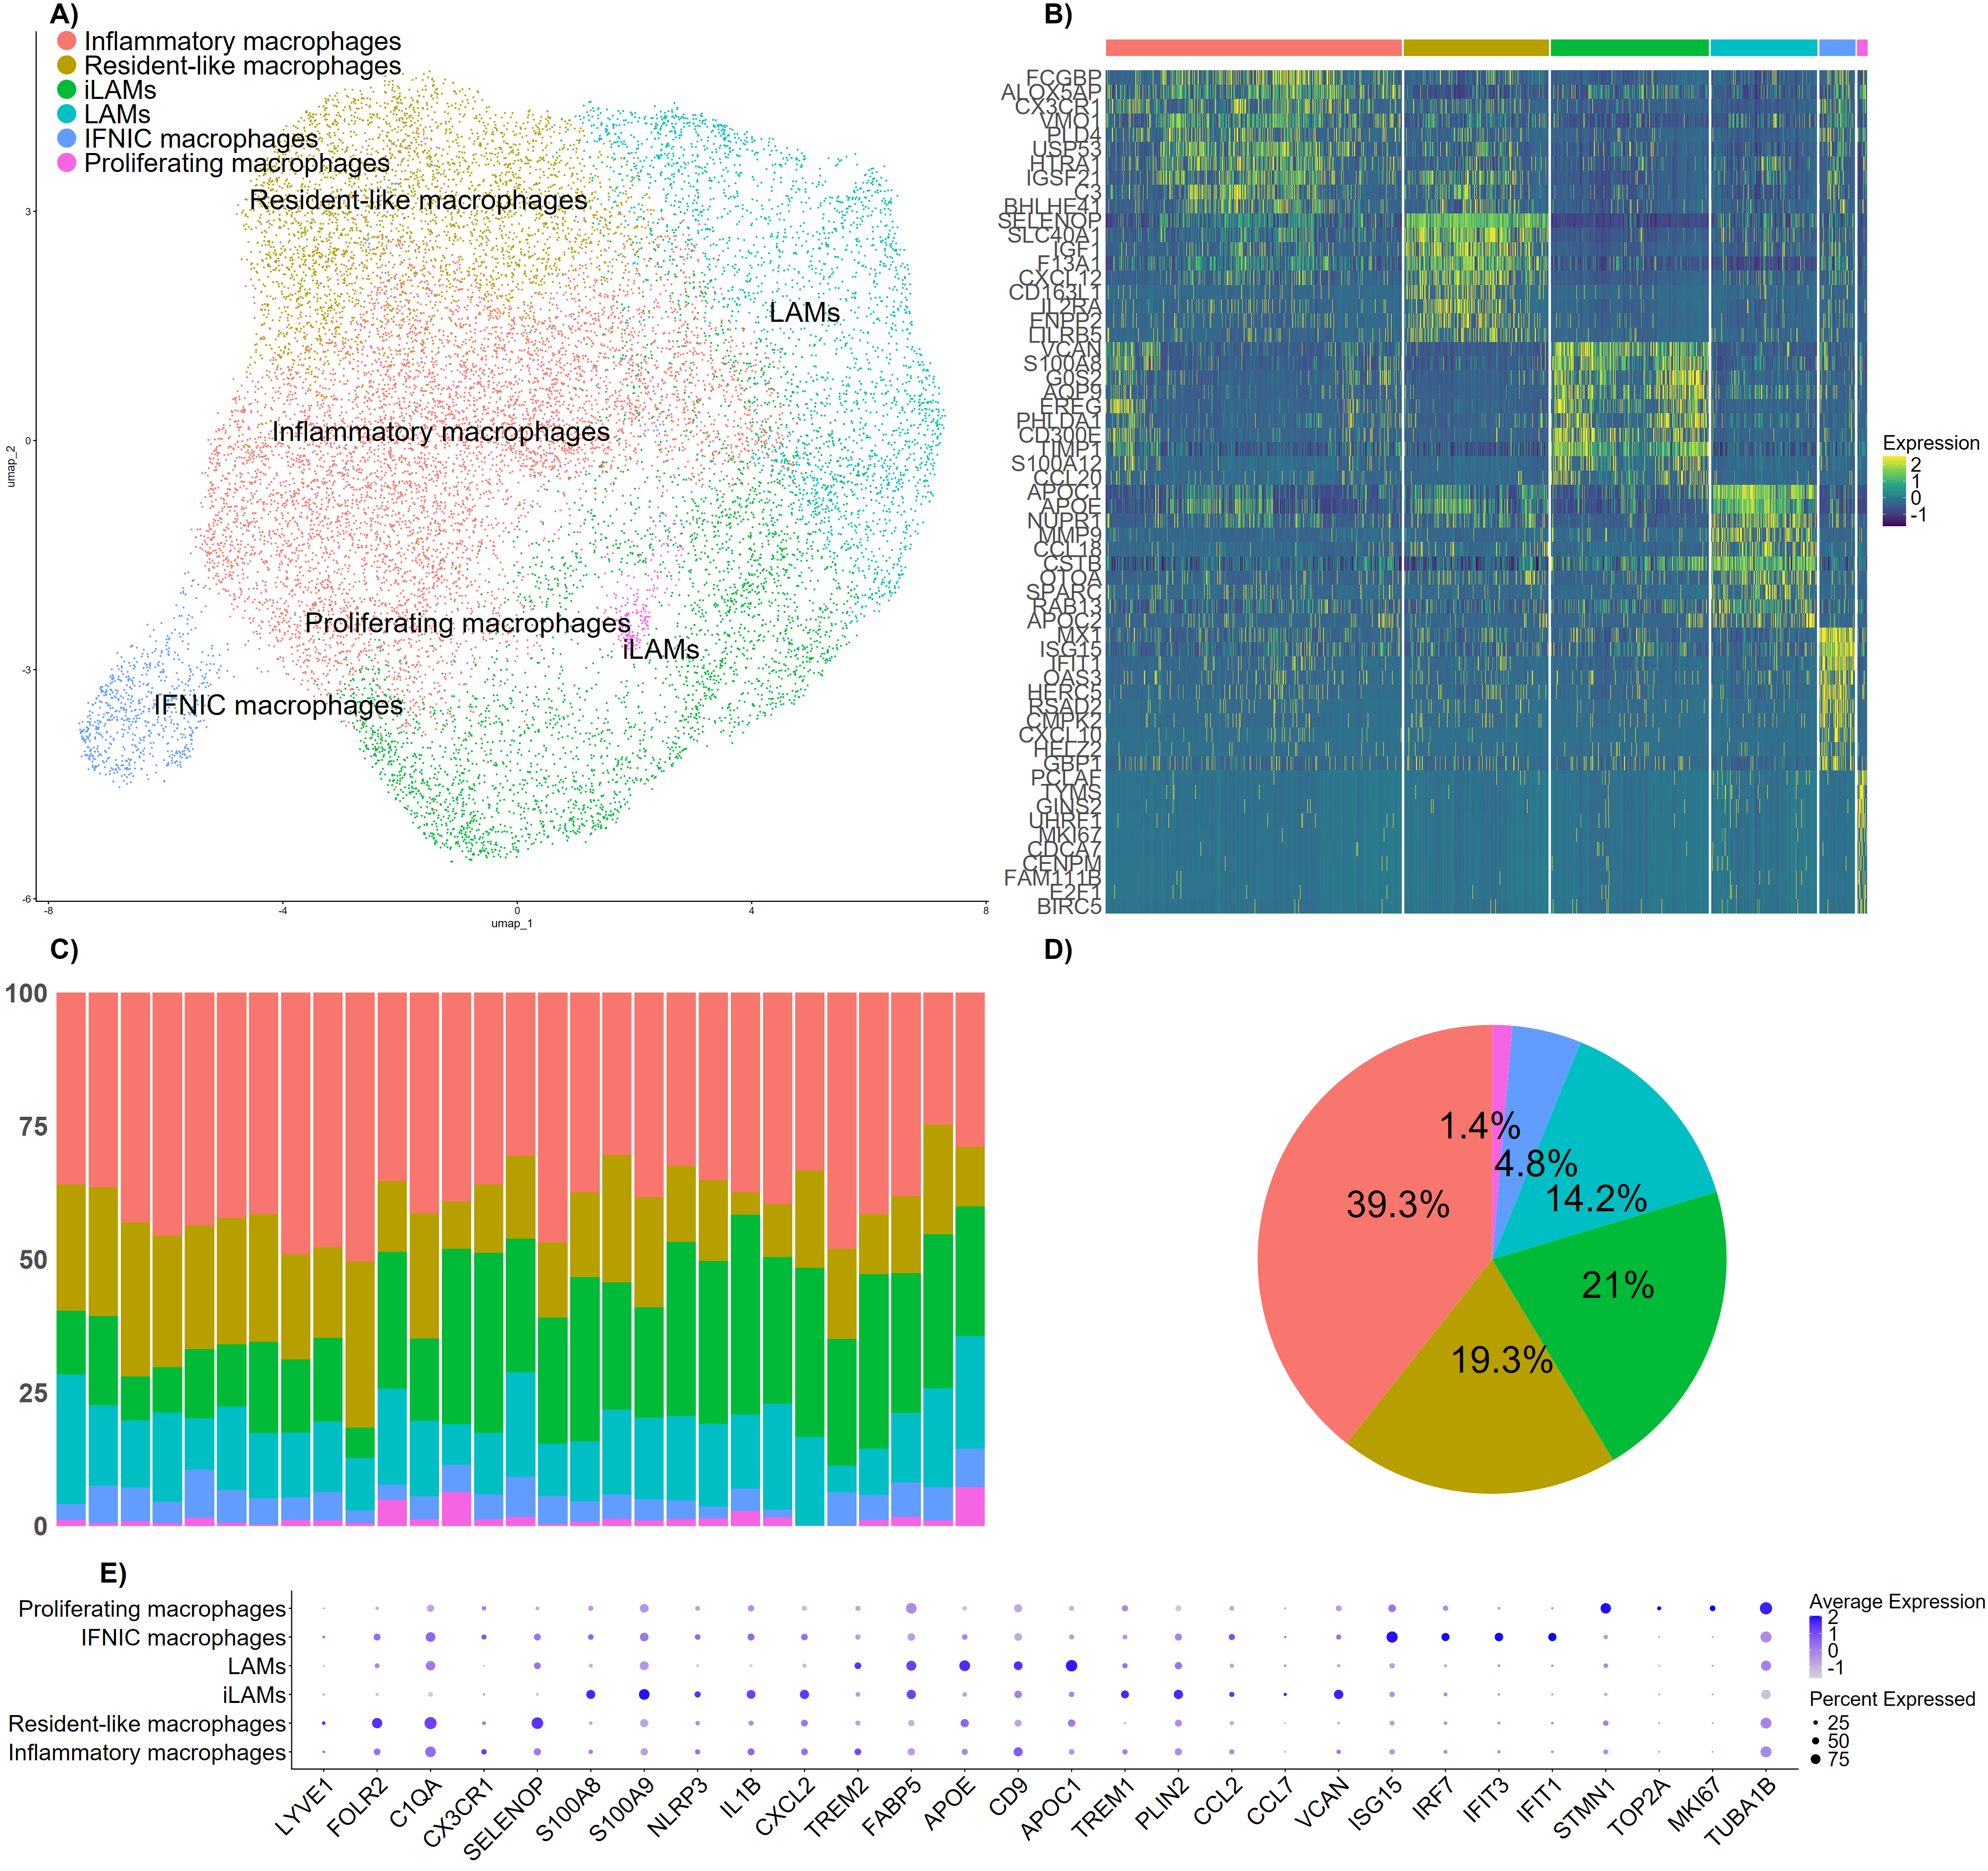

In [30]:
# Change setting for visualizing plots within VSCODE
options(repr.plot.width=34, repr.plot.height=32)

# Define the layout matrix
layout_matrix <- rbind(
  c(1, 1, 2, 2),
  c(1, 1, 2, 2),
  c(1, 1, 2, 2),
  c(3, 3, 5, 5),
  c(3, 3, 5, 5),
  c(4, 4, 4, 4)
)

# Create labeled plots
cluster_umap <- arrangeGrob(res_1.5_plot, 
                                  top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 34, fontface = "bold")))

dotplot_markers <- arrangeGrob(dotplot_all_markers, 
                               top = textGrob("E)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

final_annotation_plot <- arrangeGrob(final_annotation, 
                               top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

heatmap_plot <- arrangeGrob(heatmap, 
                               top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

barplot_plot <- arrangeGrob(barplot_per_origin, 
                               top = textGrob("C)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

pie_chart_total_plot <- arrangeGrob(pie_chart_total, 
                               top = textGrob("D)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))                                              

# Arrange the plots with labels
grid.arrange(
  final_annotation_plot, heatmap_plot, barplot_plot, dotplot_markers, pie_chart_total_plot,
  layout_matrix = layout_matrix
)

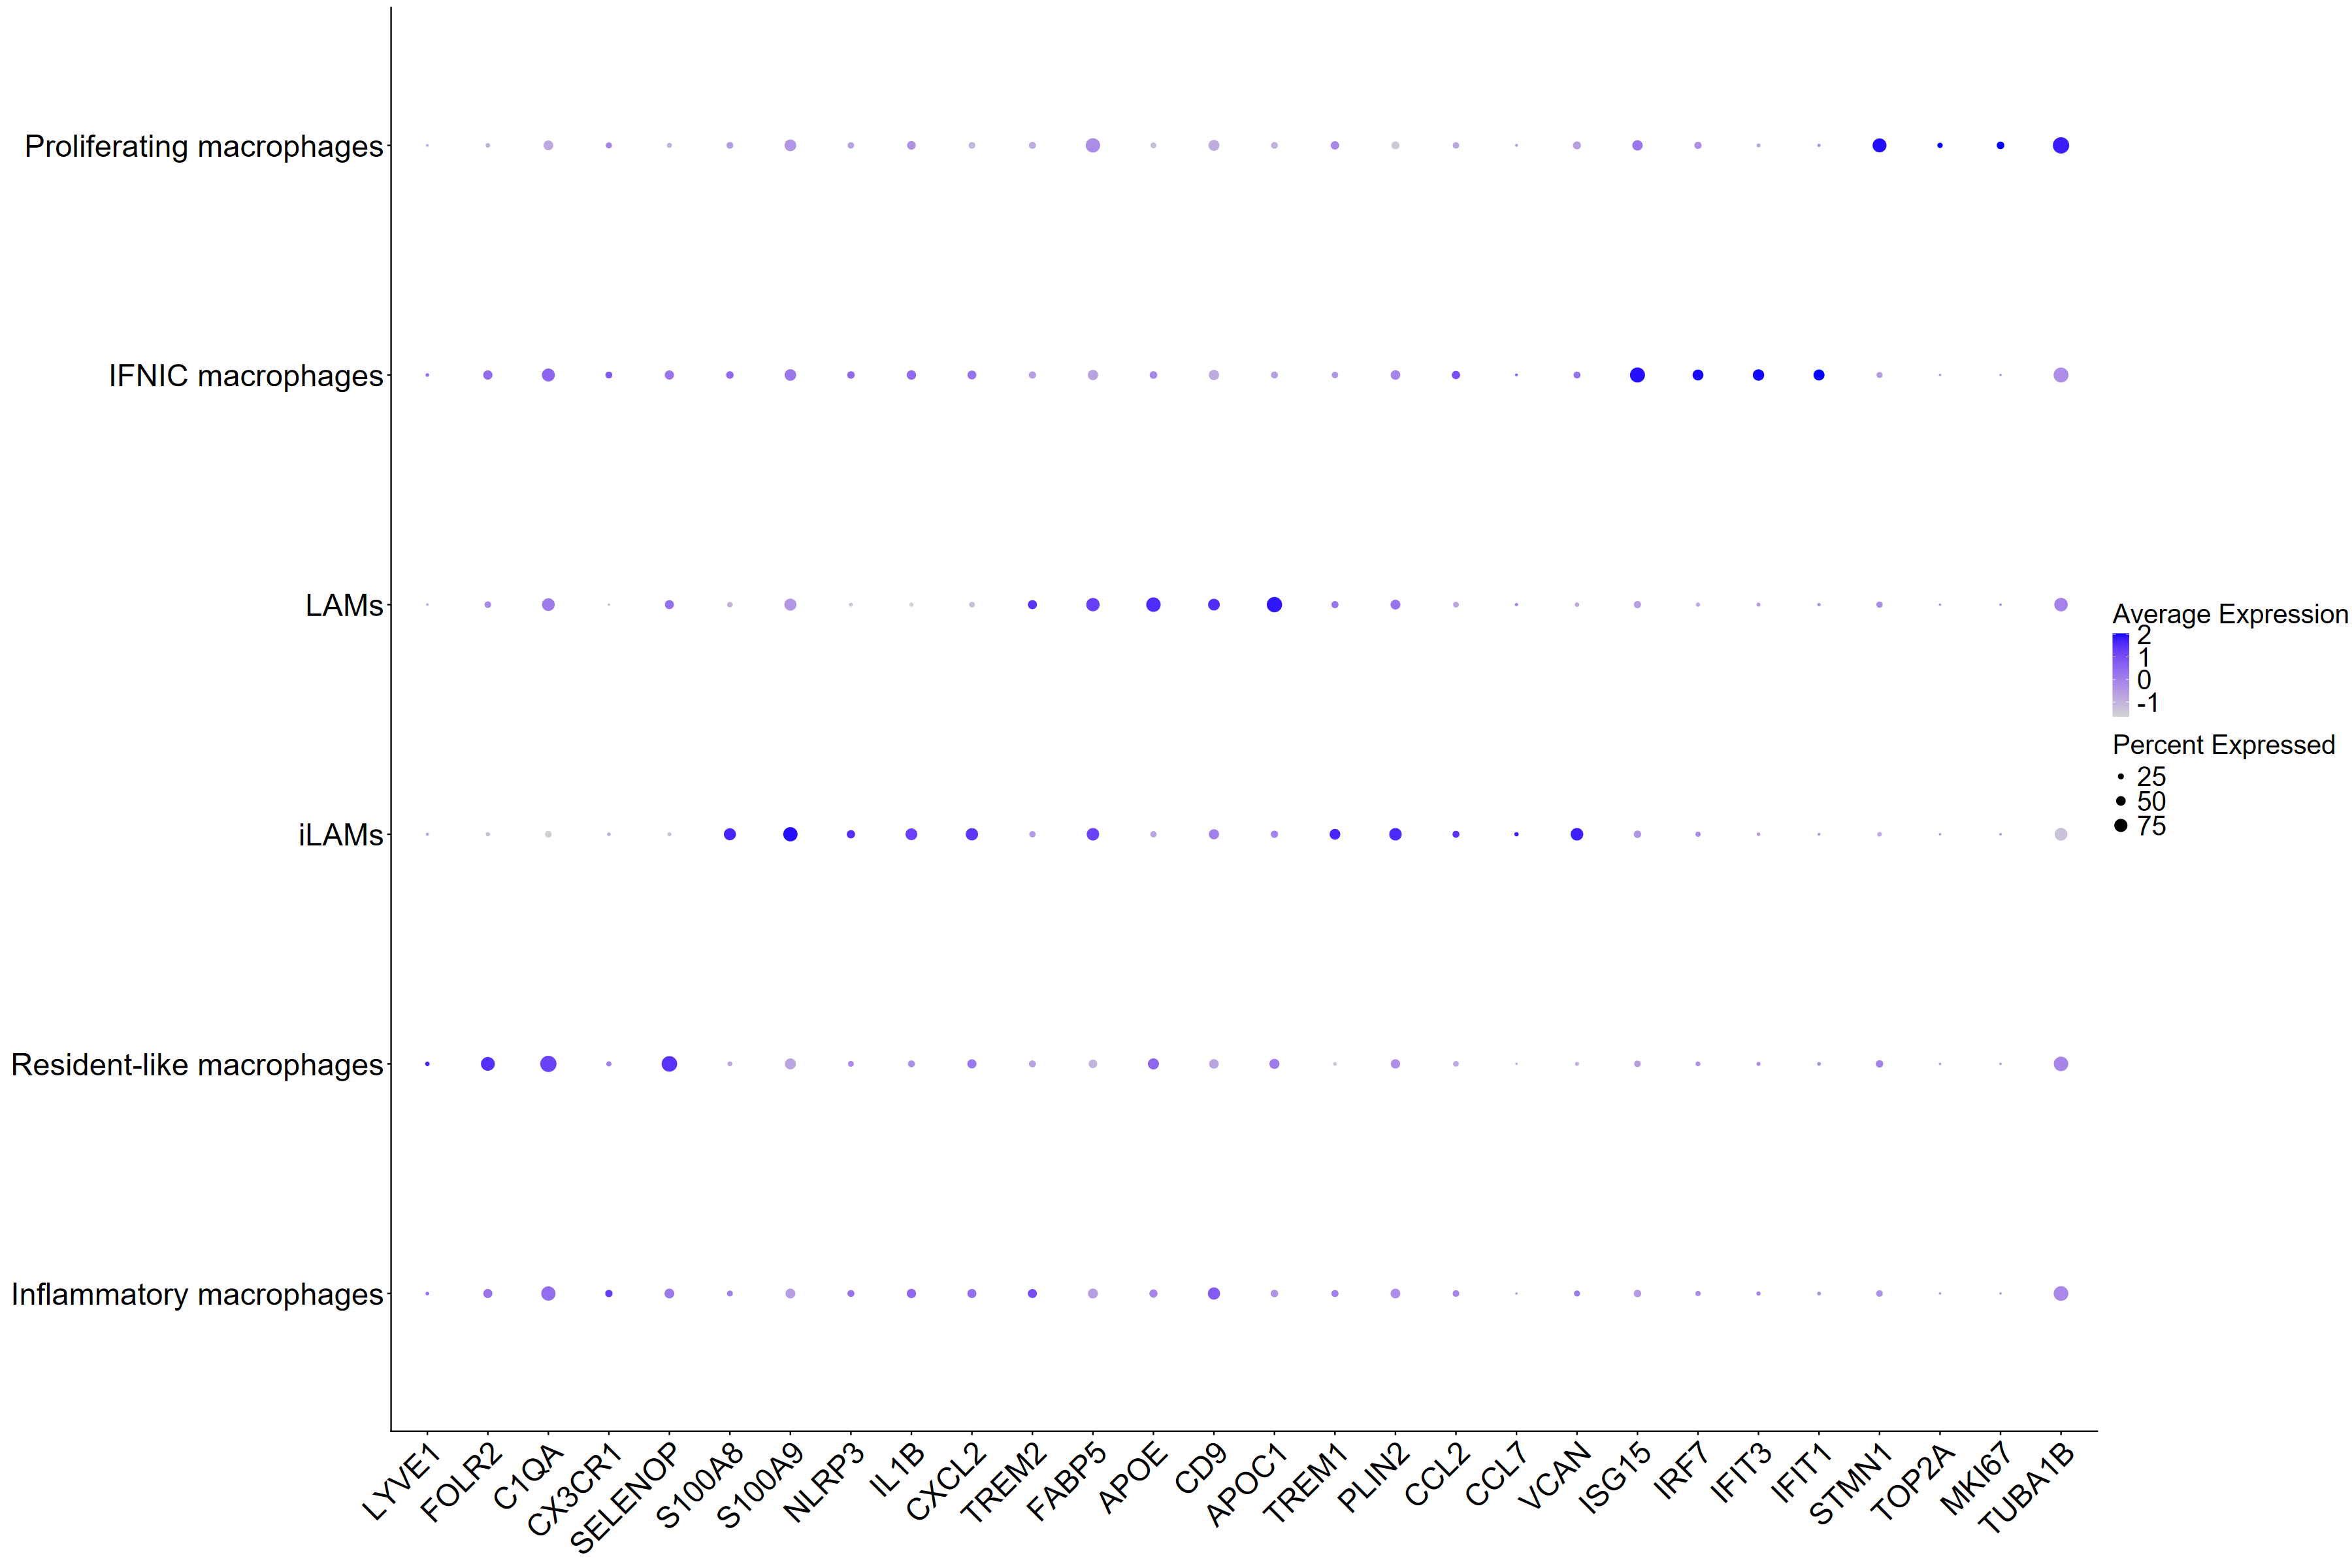

In [ ]:
# Dotplot of all marker genes
dotplot_all_markers